### Check the trend of investments over the years. To check the trend, find - Total number of fundings done in each year. Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis. Print year-wise total number of fundings also. Print years in ascending order.

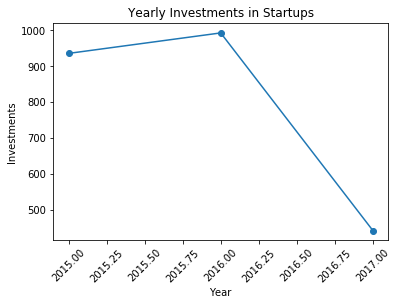

2015 936
2016 993
2017 443


In [50]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
# df = pd.read_csv('startup_funding.csv', encoding = "utf8")
# year = df["Date"].str.split("/", n = 2, expand = True)
# year = year[2]
# year[year == "/2015"] = "2015"
invest = [0,0,0]
with open("startup_funding.csv", encoding = "utf8") as data:
    reader = csv.DictReader(data)
    for row in reader:
        if row["Date"][-4:] == "2015":
            invest[0] += 1
        elif row["Date"][-4:] == "2016":
            invest[1] += 1
        else:
            invest[2] += 1
    
np_year = np.array([2015,2016,2017])
np_invest = np.array(invest)
plt.plot(np_year, np_invest, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Investments")
plt.title("Yearly Investments in Startups")
plt.xticks(rotation = 45)
plt.show()
for i in range(3):
    print(np_year[i], np_invest[i])

### Find out which cities are generally chosen for starting a startup. Find top 10 Indian cities which have most number of startups ? Plot a pie chart and visualise it. Print the city name and number of startups in that city also.

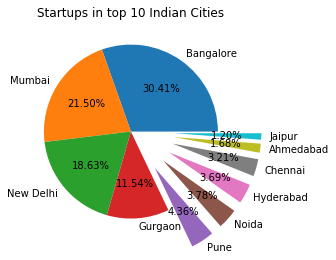

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True) 
def separateCity(city): 
    return city.split('/')[0].strip() 
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity) 
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True) 
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True) 
np_city = np.array(df_start['CityLocation'].value_counts().index[:10])
np_startup = np.array(df_start['CityLocation'].value_counts().values[:10])
plt.pie(np_startup, labels = np_city, autopct = '%.2f%%', explode = [0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5])
plt.title("Startups in top 10 Indian Cities")
plt.show()
for i in range(10):
    print(np_city[i], np_startup[i])

### Find out if cities play any role in receiving funding. Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only). Print the city and percentage with 2 decimal place after rounding off.

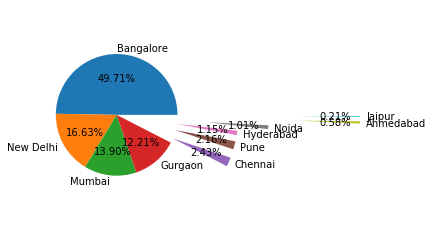

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset = ["CityLocation", "AmountInUSD"], how = 'any' ,inplace=True) 
def separateCity(city): 
    return city.split('/')[0].strip() 
def convertAmount(amt):
    return int(''.join(amt.split(',')))
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity) 
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True) 
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True) 
df_start['AmountInUSD']=df_start['AmountInUSD'].apply(convertAmount) 
new_df = df_start.groupby('CityLocation',sort=True).sum().reset_index().drop('SNo', axis = 1)
new_df = new_df.sort_values(by = ['AmountInUSD'], ascending=[False])
city = new_df["CityLocation"][:10].values
value = new_df["AmountInUSD"][:10].values
plt.pie(value, labels = city, autopct = '%.2f%%', explode = [0,0,0,0,1,1,1,1.5,3,3])
plt.axis("equal")
plt.show()
for i in range(10):
    print(city[i], format(round(10 * value[i] / np_value.mean(), 2), '.2f'))

### There are 4 different type of investments. Find out percentage of amount funded for each investment type. Plot a pie chart to visualise. Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

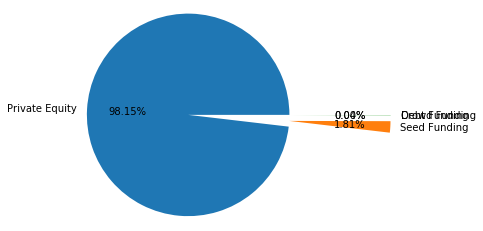

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset = ["AmountInUSD"], how = 'any' ,inplace=True) 
df_start['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True) 
df_start['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True) 
df_start['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True) 
def convertAmount(amt):
    return int(''.join(amt.split(',')))
df_start['AmountInUSD']=df_start['AmountInUSD'].apply(convertAmount)
invest = df_start.groupby('InvestmentType')["AmountInUSD"].sum().sort_values(ascending = False)
plt.pie(invest.values, labels = invest.index, autopct = '%.2f%%', explode = [0,1,1,1])
plt.axis("equal")
plt.show()
for i in range(4):
    print(invest.index[i], format(100 * invest.values[i] / invest.values.sum(),'.2f'))

### Which type of companies got more easily funding. To answer this question, find - Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only) Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset = ["AmountInUSD"],inplace=True)
df_start["IndustryVertical"].replace("eCommerce", "Ecommerce", inplace = True)
df_start["IndustryVertical"].replace("ECommerce", "Ecommerce", inplace = True)
def convertAmount(amt):
    return int(''.join(amt.split(',')))
df_start['AmountInUSD']=df_start['AmountInUSD'].apply(convertAmount)
invest = df_start.groupby('IndustryVertical')["AmountInUSD"].sum().sort_values(ascending = False)

# industry = np.array(invest.index)
np.array(invest.index)
# invest = np.array(invest.values)[:5]

array(['Ecommerce', 'Consumer Internet', 'Technology',
       'Online Marketplace', 'E-Commerce & M-Commerce platform',
       'Ecommerce Marketplace', 'Car Aggregator & Retail Mobile App',
       'Cab Aggregator', 'Cab rental Mobile app', 'Logistics',
       'Online Classifieds', 'Logistics Solution Provider',
       'Online Food Delivery', 'Hyper-local Grocery Delivery platform',
       'Budget Hotel Accommodation', 'Budget Hotel accommodation brand',
       'Music Streaming App', 'Mobile Advertising platform',
       'Online home décor marketplace', 'Healthcare', 'Education',
       'Doctor Appointment booking app', 'Ecommerce Logistics',
       'Private label Fashion eTailer',
       'Peer-to-Peer Money Transfer & Recharge App',
       'Business and IT consulting',
       'Restaurant Ratings & Reviews platform',
       'Online & Mobile classified listings', 'Online Financial Services',
       'Online and TV Shopping Marketplace', 'eCommerce platform',
       'Online Pharmacy', 'Onl

### Find top 5 startups with most amount of total funding. Print the startup name in descending order with respect to amount of funding.

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start.dropna(subset = ["AmountInUSD"],inplace=True)
def convertAmount(amt):
    return int(''.join(amt.split(',')))
df_start['AmountInUSD']=df_start['AmountInUSD'].apply(convertAmount)
df_start["StartupName"].replace("Flipkart.com", "Flipkart", inplace = True)
df_start["StartupName"].replace("Ola Cabs", "Ola", inplace = True)
df_start["StartupName"].replace("Olacabs", "Ola", inplace = True)
df_start["StartupName"].replace("Paytm Marketplace", "Paytm", inplace = True)
df_start["StartupName"].replace("Oyo Rooms", "Oyo", inplace = True)
df_start["StartupName"].replace("Oyorooms", "Oyo", inplace = True)
df_start["StartupName"].replace("OyoRooms", "Oyo", inplace = True)

invest = df_start.groupby('StartupName')["AmountInUSD"].sum().sort_values(ascending = False)
print(*invest[:5].index, sep = '\n')

Paytm
Flipkart
Ola
Snapdeal
Oyo


### Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times. Print the startup name in descending order with respect to the number of funding round as integer value.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start["StartupName"].replace("Flipkart.com", "Flipkart", inplace = True)
df_start["StartupName"].replace("Ola Cabs", "Ola", inplace = True)
df_start["StartupName"].replace("Olacabs", "Ola", inplace = True)
df_start["StartupName"].replace("Paytm Marketplace", "Paytm", inplace = True)
df_start["StartupName"].replace("Oyo Rooms", "Oyo", inplace = True)
df_start["StartupName"].replace("Oyorooms", "Oyo", inplace = True)
df_start["StartupName"].replace("OyoRooms", "Oyo", inplace = True)
df_start["StartupName"].replace("OYO Rooms", "Oyo", inplace = True)
ans = df_start["StartupName"].value_counts()[:5]
for i in range(5):
    print(ans.index[i], ans.values[i])

Ola 9
Swiggy 7
Paytm 6
Oyo 6
UrbanClap 6


### Find the Investors who have invested maximum number of times.Print the investor name and number of times invested as integer value.

In [320]:
import numpy as np
import csv
d = {}
with open("startup_funding.csv", encoding = "utf8") as data:
    reader = csv.DictReader(data)
    for row in reader:
        investors = row["InvestorsName"].split(',')
        for i in investors:
            i = i.strip()
            d[i] = d.get(i,0) + 1
print(max(d, key = d.get), d[max(d, key = d.get)])

Sequoia Capital 64
